First 5 rows:


,OpenPrice,HighPrice,LowPrice,ClosePrice,volume,MarketCap
0,7042.95,7101.03,6998.87,7017.35,1353.6716,9549478.0
1,7015.78,7070.00,7015.22,7042.34,338.5957,2384278.0
2,7035.04,7131.85,7024.51,7058.97,874.0480,6180810.5
3,7058.97,7230.00,7021.29,7196.27,1570.7167,11247725.0
4,7193.30,7300.18,7169.99,7185.01,1807.0952,13054075.0



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5863 entries, 0 to 5862
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   5863 non-null   float64
 1   HighPrice   5863 non-null   float64
 2   LowPrice    5863 non-null   float64
 3   ClosePrice  5863 non-null   float64
 4   volume      5863 non-null   float64
 5   MarketCap   5863 non-null   float64
dtypes: float64(6)
memory usage: 275.0 KB


None


Summary Statistics:


,OpenPrice,HighPrice,LowPrice,ClosePrice,volume,MarketCap
count,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5.863000e+03
mean,22402.319933,22711.426683,22058.375419,22404.225013,1604.725406,2.703241e+07
std,18191.321627,18447.913804,17898.270782,18190.280445,1761.516461,3.531651e+07
min,3153.530000,3175.850000,3122.280000,3150.350000,48.710325,6.763969e+05
25%,7902.055000,7999.430000,7765.255000,7904.395000,536.876908,7.865687e+06
50%,11406.630000,11540.720000,11283.370000,11412.040000,1068.626028,1.582999e+07
75%,38699.025000,39299.490000,38063.040000,38691.095000,2016.940875,3.211179e+07
max,68635.050000,69000.000000,67342.010000,68627.010000,20914.274609,5.151514e+08


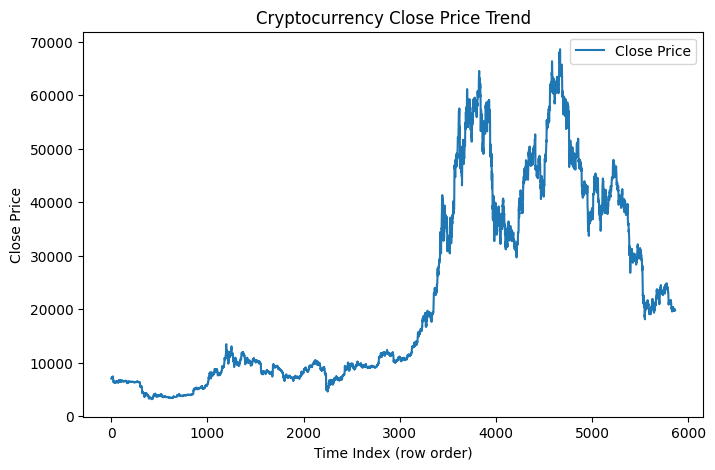

📊 Model Performance (Linear Regression):
RMSE: 286.21
MAE: 192.75
R² Score: 0.9993


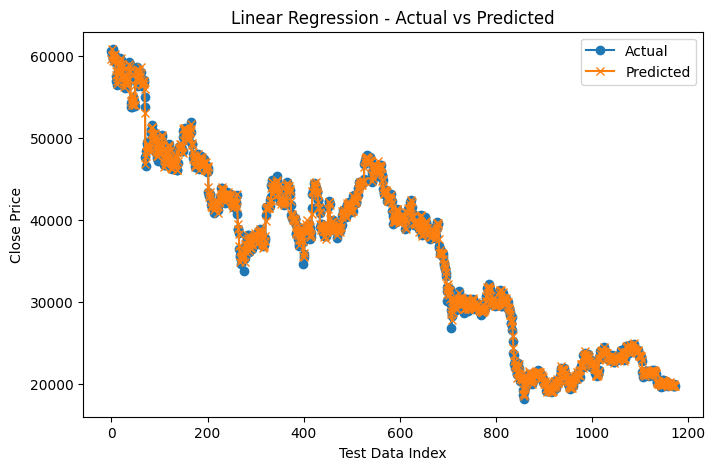

In [2]:
# ---------------------------
# Cryptocurrency Price Prediction (Model 1: Linear Regression)
# ---------------------------

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 2: Load Data
df = pd.read_csv("btc.csv")

# Step 3: Remove CloseTime column entirely since it's useless here
if 'CloseTime' in df.columns:
    df = df.drop(columns=['CloseTime'])

# Step 4: Handle missing values (if any)
df = df.dropna()

# Step 5: Explore Data
print("First 5 rows:")
display(df.head())

print("\nData Info:")
display(df.info())

print("\nSummary Statistics:")
display(df.describe())

# Step 6: Visualization - ClosePrice trend
plt.figure(figsize=(8,5))
plt.plot(df['ClosePrice'], label='Close Price')
plt.xlabel("Time Index (row order)")
plt.ylabel("Close Price")
plt.title("Cryptocurrency Close Price Trend")
plt.legend()
plt.show()

# Step 7: Define Features (X) and Target (y)
X = df.drop(columns=['ClosePrice'])
y = df['ClosePrice']

# Step 8: Train-Test Split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # time-order preserved
)

# Step 9: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 10: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 11: Predictions
y_pred = model.predict(X_test_scaled)

# Step 12: Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Model Performance (Linear Regression):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# Step 13: Visualization - Predictions vs Actual
plt.figure(figsize=(8,5))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred, label="Predicted", marker='x')
plt.xlabel("Test Data Index")
plt.ylabel("Close Price")
plt.title("Linear Regression - Actual vs Predicted")
plt.legend()
plt.show()
